Os seguintes scripts são uma versão Python do curso de Machine Learning do professor Andrew Ng da universidade de Stanford leccionado na plataforma Coursera.

**Nota: Todos os dados e estrutura do exercício pertencem à Universidade de Stanford**

**Ressalva:** Os scripts não estão implementados de forma modular para todas as funções serem consultadas no mesmo Jupyter Notebook - ao contrário da implementação Octave.

# Exercício 1 - Carregar e Visualizar os dados

In [13]:
# Importar as libraries do numpy para lidar com vectores e matrizes
import numpy as np
# Importar o matplotlib para ferramentas gráficas
import matplotlib.pyplot as plt

# Import math 
import math 

# Importar as funções de optimização do SciPy
from scipy import optimize, io
# Importar a função de rodar imagens do SciPy
from scipy.ndimage import rotate

#Matplotlib notebook property
%matplotlib inline

#Importar o Pandas
import pandas as pd

In [4]:
# Usamos o SciPy para carregar os valores de cada feature
ex3_file = io.loadmat('ex3data1.mat')
X = np.array(ex3_file['X'])
y = np.array(ex3_file['y'])

print('# de imagens de treino: {}'.format(len(X)))
m = len(X)

# de imagens de treino: 5000


Estes dados são uns dados comuns a nível de instrução de vários cursos de Data Science - chamado de MNIST. Os dados são representações vectoriais de uma imagem que se encontra expandida num vector dimensional de 400 variáveis com intensindades de cor diferentes - cada valor contém um nível específico de intensidade. Ao reorganizarmos os dados noutras dimensões somos capazes de ver estes dígitos de forma clara.

**Vamos analisar os 100 dígitos aleatórios do data set:**

In [5]:
# Selecionar 10 indices aleatórios entre 0 e 4999 
indice = np.random.choice(X.shape[0], 101, replace=False) 

# Seleccionar da Matrix X apenas os índices sorteados acima
sel = X[indice]

In [6]:
def mostrarDigitos(
    imagens: np.array
) -> None:
    '''
    Mapeia uma grelha 10X10 de dígitos 
    escritos à mão do dataset MNIST.
    
    Args:
        imagens(array): Vector com as imagens para colocar num gráfico
    Retorna:
        None
    '''
    fig=plt.figure(figsize=(10, 10))
    colunas = 10
    obs = 10
    # Iterar por cada ponto da grelha e colocar lá o dígito mapeado numa imagem de 20 por 20 píxeis.
    for i in range(1, sel.shape[0]):
        img = imagens[i].reshape(20,20)
        fig.add_subplot(obs, colunas, i)
        plt.imshow(rotate(img[::-1],270))
        plt.axis('off')
    plt.show()

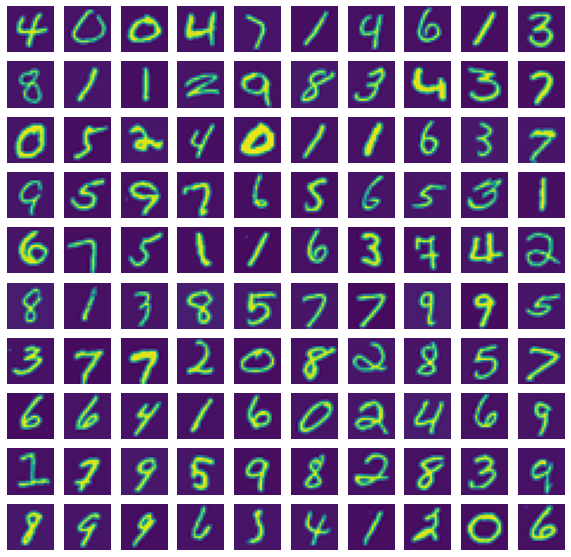

In [7]:
# Mostrar a grelha de dígitos
mostrarDigitos(sel)

Queremos desenvolver uma classificação Multi-Classe. Como iremos proceder? Neste caso o nosso target não é binário 1 vs. 0 mas uma abordagem Um vs. Todos - isto é, com base numas features queremos perceber qual das classes têm a maior probabilidade. Cada uma das observações terá assim alocada uma probabilidade de pertencer a cada um dos dígitos (0-9).
<br>
Tal como o prof. Andrew, vamos manter a classe 0 mapeada a 10.
<br>

# Exercício 2 - Redes Neuronais

Vamos utilizar os parâmetros pré-treinados de uma rede renural. A rede neuronal que vamos utilizar contém pesos pré treinados (thetas) para várias camadas da rede que vão ser aplicados de forma semelhante ao esquema abaixo:

<img src="assets/NeuralNetwork.JPG">

A nossa dimensão de input na primeira camada contém 401 nós (400 colunas do vector X + intercept (vectpr de 1's)); 
<br>
A nossa camada escondida contém 25 nós + intercept; <br>
A nossa camada de output contém 10 nós (um nó por cada valor de target com a respectiva probabilidade); <br>

In [9]:
# Carregar as matrizes com os pesos da rede neuronal pré-treinados 

pesos = io.loadmat('ex3weights.mat')

# Definir os parametros da rede neuronal

camada_entrada = 400
camada_oculta = 25
num_classes = 10

In [10]:
# Assignar o theta 1 e theta 2 do vector de pesos
Theta1 = pesos['Theta1']
Theta2 = pesos['Theta2']

In [11]:
# Definir a função sigmóide 
def sigmoide(x: np.array)-> np.array:
    '''
    Retorna o valor sigmóide para cada element de um vector
    
    Args:
        x(np.array): Vector com os valores originais
    Returns:
        (np.array): Sigmóides resultantes do vector original
    '''
    return(1 / (1 + np.exp(-x)))

In [12]:
# Definir a função e previsão

def prever(
    Theta1: np.array, 
    Theta2: np.array, 
    X: np.array
)-> np.array:
    '''
    Devolve a classe com a máxima previsão pela Rede Neuronal,
    no nosso caso, a maior probabilidade do dígito ser 0 a 9.
    
    Argumentos:
        Theta1(np.array): Primeiro grupo de thetas para aplicar
        à camada de entrada da rede neuronal.
        Theta2(np.array): Segundo grupo de thetas para aplicar 
        à camada escondida da rede neuronal.
        X(np.array): Matriz original com as imagens.
    Returns:
        previsoes(np.array): vector de números com o número previsto
    '''
    m = X.shape[0]

    # Adicionar o intercept
    vector_uns = np.ones((len(X),1))
    X_ext = np.hstack((vector_uns,X))
    
    staging_1 = sigmoide(np.dot(X_ext,Theta1.T))
    
    # Adicionar vector Staging_1
    vector_uns = np.ones((len(X),1))
    staging_1 = np.hstack((vector_uns,staging_1))
    
    staging_2 = sigmoide(np.dot(staging_1, Theta2.T))
    
    # Vamos usar a função idxmax para obter a probabilidade máxima assignada a cada observações - adicionamos
    # um para obter o dígito real
    previsoes = pd.DataFrame(staging_2).idxmax(axis=1)+1
    
    return np.array(previsoes)

In [14]:
# Obter as previsões
previsoes = prever(Theta1,Theta2,X)

In [16]:
# Verificar a taxa de acerto da rede neuronal

print("A taxa de acerto da rede neuronal é {:.2%} ".format(sum(np.array([1 if val == True else 0 for val in previsoes.reshape(len(y),1)==y]))/len(y)))

A taxa de acerto da rede neuronal é 97.52% 


Com a regressão logística tínhamos obtido uma percentagem de acerto de 91.2%. Com a rede neuronal, conseguimos obter mais  pontos percentuais, uma grande melhoria! E fizémos isso apenas a usar um algoritmo capaz de lidar com funções não-lineares, uma alteração relativamente simples.
<br>
Na próxima aula, vamos perceber como podemos treinar estes parâmetros de todas as camadas das redes neuronais.

Agora, usando os pesos que foram pré-treinados, podemos verificar, aleatoriamente, o que a rede neuronal prevê para determinados dígitos nos nossos dados fonte:


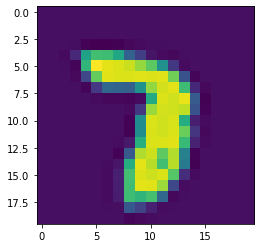

O dígito é 7
Quer ver outro dígito? Escrever "end" para terminar com o loop ou outra coisa para continuar.a


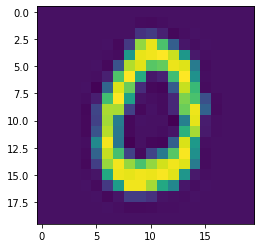

O dígito é 10
Quer ver outro dígito? Escrever "end" para terminar com o loop ou outra coisa para continuar.a


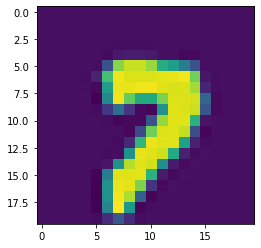

O dígito é 7
Quer ver outro dígito? Escrever "end" para terminar com o loop ou outra coisa para continuar.a


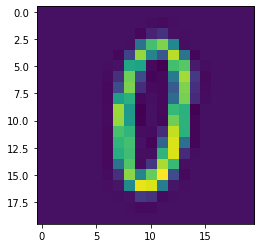

O dígito é 10
Quer ver outro dígito? Escrever "end" para terminar com o loop ou outra coisa para continuar.end


In [19]:
aux_break = 1

while aux_break:
    indice = np.random.randint(0,len(X))
    img = X[indice].reshape(20,20)
    plt.imshow(rotate(img[::-1],270))
    plt.show()
    print('O dígito é {}'.format(int(y[indice])))
    aux_break = input('Quer ver outro dígito? Escrever "end" para terminar com o loop ou outra coisa para continuar.')   
    if aux_break == "end":
        break

Usando os pesos pré-treinados conseguimos atingir uma boa performance em prever qual o dígito na imagem com uma rede neuronal. Nas próximas aulas vamos treinar a rede neuronal usando algumas ferramentas que já conhecemos como o método do gradiente descente ou funções de custo para conseguirmos obter o valor destes pesos pré-treinados.